# Introduction

Since Jan. 1, 2015, [The Washington Post](https://www.washingtonpost.com/) has been compiling a database of every fatal shooting in the US by a police officer in the line of duty. 

<center><img src=https://i.imgur.com/sX3K62b.png></center>

While there are many challenges regarding data collection and reporting, The Washington Post has been tracking more than a dozen details about each killing. This includes the race, age and gender of the deceased, whether the person was armed, and whether the victim was experiencing a mental-health crisis. The Washington Post has gathered this supplemental information from law enforcement websites, local new reports, social media, and by monitoring independent databases such as "Killed by police" and "Fatal Encounters". The Post has also conducted additional reporting in many cases.

There are 4 additional datasets: US census data on poverty rate, high school graduation rate, median household income, and racial demographics. [Source of census data](https://factfinder.census.gov/faces/nav/jsf/pages/community_facts.xhtml).

### Upgrade Plotly

Run the cell below if you are working with Google Colab

In [ ]:
%pip install --upgrade plotly

     |████████████████████████████████| 13.1MB 310kB/s 
  Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


## Import Statements

In [2]:
# This might be helpful:
from collections import Counter

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns

## Notebook Presentation

In [ ]:
pd.options.display.float_format = "{:,.2f}".format

## Load the Data

In [3]:
df_hh_income = pd.read_csv("Median_Household_Income_2015.csv", encoding="windows-1252")
df_pct_poverty = pd.read_csv(
    "Pct_People_Below_Poverty_Level.csv", encoding="windows-1252"
)
df_pct_completed_hs = pd.read_csv(
    "Pct_Over_25_Completed_High_School.csv", encoding="windows-1252"
)
df_share_race_city = pd.read_csv("Share_of_Race_By_City.csv", encoding="windows-1252")
df_fatalities = pd.read_csv("Deaths_by_Police_US.csv", encoding="windows-1252")

# Preliminary Data Exploration

* What is the shape of the DataFrames? 
* How many rows and columns do they have?
* What are the column names?
* Are there any NaN values or duplicates?

##### Exploration of df_hh_income:

In [7]:
print(f"The shape of df_hh_income is: {df_hh_income.shape}")
print(f"It has {df_hh_income.shape[0]} rows and {df_hh_income.shape[1]} columns")
print(f"Column names of df_hh_income are: {df_hh_income.columns}")
print(
    f"NaN values of df_hh_income: {df_hh_income.isna().values.any()}, and NaN count: {df_hh_income.isna().values.sum()}"
)
print(
    f"Duplicates of df_hh_income: {df_hh_income.duplicated().values.any()}, and duplicates count: {df_hh_income.duplicated().values.sum()}"
)

The shape of df_hh_income is: (29322, 3)
It has 29322 rows and 3 columns
Column names of df_hh_income are: Index(['Geographic Area', 'City', 'Median Income'], dtype='object')
NaN values of df_hh_income: True, and NaN count: 51
Duplicates of df_hh_income: False, and duplicates count: 0


##### Exploration of df_pct_poverty:

In [8]:
print(f"The shape of df_pct_poverty is: {df_pct_poverty.shape}")
print(f"It has {df_pct_poverty.shape[0]} rows and {df_pct_poverty.shape[1]} columns")
print(f"Column names of df_pct_poverty are: {df_pct_poverty.columns}")
print(
    f"NaN values of df_pct_poverty: {df_pct_poverty.isna().values.any()}, and NaN count: {df_pct_poverty.isna().values.sum()}"
)
print(
    f"Duplicates of df_pct_poverty: {df_pct_poverty.duplicated().values.any()}, and duplicates count: {df_pct_poverty.duplicated().values.sum()}"
)

The shape of df_pct_poverty is: (29329, 3)
It has 29329 rows and 3 columns
Column names of df_pct_poverty are: Index(['Geographic Area', 'City', 'poverty_rate'], dtype='object')
NaN values of df_pct_poverty: False, and NaN count: 0
Duplicates of df_pct_poverty: False, and duplicates count: 0


##### Exploration of df_pct_completed_hs:

In [12]:
print(f"The shape of df_pct_completed_hs is: {df_pct_completed_hs.shape}")
print(
    f"It has {df_pct_completed_hs.shape[0]} rows and {df_pct_completed_hs.shape[1]} columns"
)
print(f"Column names of df_pct_completed_hs are: {df_pct_completed_hs.columns}")
print(
    f"NaN values of df_pct_completed_hs: {df_pct_completed_hs.isna().values.any()}, and NaN count: {df_pct_completed_hs.isna().values.sum()}"
)
print(
    f"Duplicates of df_pct_completed_hs: {df_pct_completed_hs.duplicated().values.any()}, and duplicates count: {df_pct_completed_hs.duplicated().values.sum()}"
)

The shape of df_pct_completed_hs is: (29329, 3)
It has 29329 rows and 3 columns
Column names of df_pct_completed_hs are: Index(['Geographic Area', 'City', 'percent_completed_hs'], dtype='object')
NaN values of df_pct_completed_hs: False, and NaN count: 0
Duplicates of df_pct_completed_hs: False, and duplicates count: 0


##### Exploration of df_share_race_city:

In [11]:
print(f"The shape of df_share_race_city is: {df_share_race_city.shape}")
print(
    f"It has {df_share_race_city.shape[0]} rows and {df_share_race_city.shape[1]} columns"
)
print(f"Column names of df_share_race_city are: {df_share_race_city.columns}")
print(
    f"NaN values of df_share_race_city: {df_share_race_city.isna().values.any()}, and NaN count: {df_share_race_city.isna().values.sum()}"
)
print(
    f"Duplicates of df_share_race_city: {df_share_race_city.duplicated().values.any()}, and duplicates count: {df_share_race_city.duplicated().values.sum()}"
)

The shape of df_share_race_city is: (29268, 7)
It has 29268 rows and 7 columns
Column names of df_share_race_city are: Index(['Geographic area', 'City', 'share_white', 'share_black',
       'share_native_american', 'share_asian', 'share_hispanic'],
      dtype='object')
NaN values of df_share_race_city: False, and NaN count: 0
Duplicates of df_share_race_city: False, and duplicates count: 0


##### Exploration of df_fatalities:

In [13]:
print(f"The shape of df_fatalities is: {df_fatalities.shape}")
print(f"It has {df_fatalities.shape[0]} rows and {df_fatalities.shape[1]} columns")
print(f"Column names of df_fatalities are: {df_fatalities.columns}")
print(
    f"NaN values of df_fatalities: {df_fatalities.isna().values.any()}, and NaN count: {df_fatalities.isna().values.sum()}"
)
print(
    f"Duplicates of df_fatalities: {df_fatalities.duplicated().values.any()}, and duplicates count: {df_fatalities.duplicated().values.sum()}"
)

The shape of df_fatalities is: (2535, 14)
It has 2535 rows and 14 columns
Column names of df_fatalities are: Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera'],
      dtype='object')
NaN values of df_fatalities: True, and NaN count: 346
Duplicates of df_fatalities: False, and duplicates count: 0


💡Summary: df_hh_income and df_fatalities have NaN values.

## Data Cleaning - Check for Missing Values and Duplicates

Consider how to deal with the NaN values. Perhaps substituting 0 is appropriate. 

In [17]:
df_hh_income.isna().any()

Geographic Area    False
City               False
Median Income       True
dtype: bool

In [19]:
# drop na of df_hh_income as there are nan in Geo and City columns
df_hh_income_clean = df_hh_income.dropna()
df_hh_income_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29271 entries, 0 to 29320
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Geographic Area  29271 non-null  object
 1   City             29271 non-null  object
 2   Median Income    29271 non-null  object
dtypes: object(3)
memory usage: 914.7+ KB


In [20]:
df_fatalities.isna().any()

id                         False
name                       False
date                       False
manner_of_death            False
armed                       True
age                         True
gender                     False
race                        True
city                       False
state                      False
signs_of_mental_illness    False
threat_level               False
flee                        True
body_camera                False
dtype: bool

In [21]:
df_fatalities.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [22]:
# fillna(0) of df_fatalities
df_fatalities_clean = df_fatalities.fillna(0)
df_fatalities_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2535 entries, 0 to 2534
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       2535 non-null   int64  
 1   name                     2535 non-null   object 
 2   date                     2535 non-null   object 
 3   manner_of_death          2535 non-null   object 
 4   armed                    2535 non-null   object 
 5   age                      2535 non-null   float64
 6   gender                   2535 non-null   object 
 7   race                     2535 non-null   object 
 8   city                     2535 non-null   object 
 9   state                    2535 non-null   object 
 10  signs_of_mental_illness  2535 non-null   bool   
 11  threat_level             2535 non-null   object 
 12  flee                     2535 non-null   object 
 13  body_camera              2535 non-null   bool   
dtypes: bool(2), float64(1), 

# Chart the Poverty Rate in each US State

Create a bar chart that ranks the poverty rate from highest to lowest by US state. Which state has the highest poverty rate? Which state has the lowest poverty rate?  Bar Plot

In [33]:
df_pct_poverty.poverty_rate = df_pct_poverty.poverty_rate.apply(
    lambda x: float(x.replace("-", "0"))
)
df_pct_poverty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Geographic Area  29329 non-null  object 
 1   City             29329 non-null  object 
 2   poverty_rate     29329 non-null  float64
dtypes: float64(1), object(2)
memory usage: 687.5+ KB


In [34]:
df_pct_poverty_state = df_pct_poverty.groupby("Geographic Area", as_index=False).agg(
    {"poverty_rate": pd.Series.mean}
)
df_pct_poverty_state.head()

,Geographic Area,poverty_rate
0,AK,18.678592
1,AL,20.611795
2,AR,22.963216
3,AZ,25.268071
4,CA,16.888371


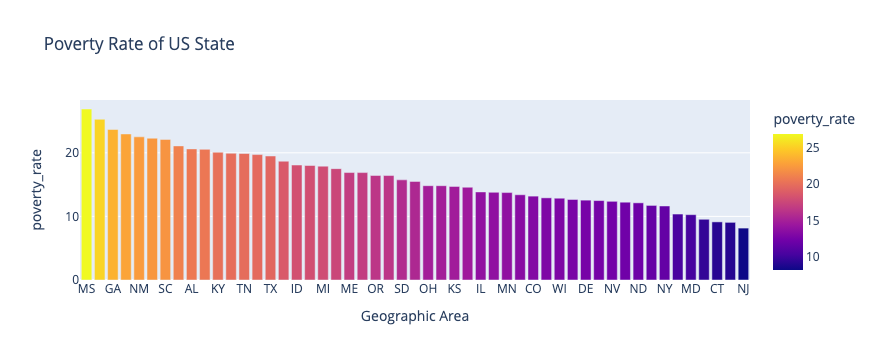

In [37]:
pct_poverty_bar = px.bar(
    data_frame=df_pct_poverty_state,
    x="Geographic Area",
    y="poverty_rate",
    color="poverty_rate",
    title="Poverty Rate of US State",
)
pct_poverty_bar.update_layout(xaxis={"categoryorder": "total descending"})
pct_poverty_bar.show()

In [41]:
print(
    f"Highest poverty state: {df_pct_poverty_state.iloc[df_pct_poverty_state.poverty_rate.idxmax()]}"
)
print(
    f"Lowest poverty state: {df_pct_poverty_state.iloc[df_pct_poverty_state.poverty_rate.idxmin()]}"
)

Highest poverty state: Geographic Area           MS
poverty_rate       26.884254
Name: 25, dtype: object
Lowest poverty state: Geographic Area          NJ
poverty_rate       8.160917
Name: 31, dtype: object


# Chart the High School Graduation Rate by US State

Show the High School Graduation Rate in ascending order of US States. Which state has the lowest high school graduation rate? Which state has the highest?

In [47]:
df_pct_completed_hs.head()

,Geographic Area,City,percent_completed_hs
0,AL,Abanda CDP,21.2
1,AL,Abbeville city,69.1
2,AL,Adamsville city,78.9
3,AL,Addison town,81.4
4,AL,Akron town,68.6


In [48]:
df_pct_completed_hs.percent_completed_hs = pd.to_numeric(
    df_pct_completed_hs.percent_completed_hs.str.replace("-", "0")
)
df_pct_completed_hs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Geographic Area       29329 non-null  object 
 1   City                  29329 non-null  object 
 2   percent_completed_hs  29329 non-null  float64
dtypes: float64(1), object(2)
memory usage: 687.5+ KB


In [50]:
df_pct_chs_geo = df_pct_completed_hs.groupby("Geographic Area", as_index=False).agg(
    {"percent_completed_hs": pd.Series.mean}
)
df_pct_chs_geo.head()

,Geographic Area,percent_completed_hs
0,AK,80.098028
1,AL,80.163419
2,AR,79.949538
3,AZ,79.218182
4,CA,80.824639


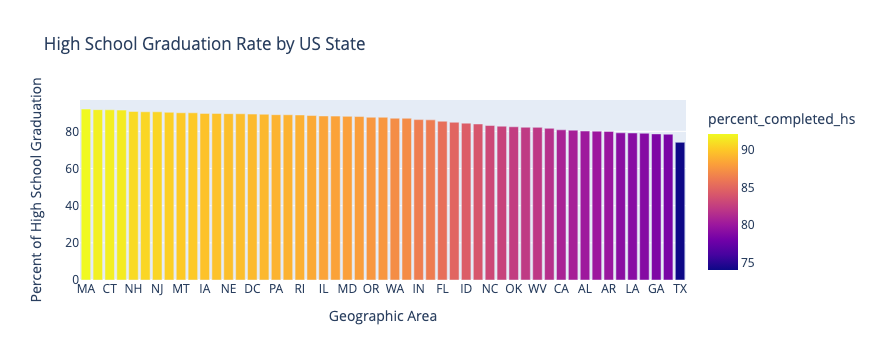

In [54]:
pct_chs_bar = px.bar(
    data_frame=df_pct_chs_geo,
    x="Geographic Area",
    y="percent_completed_hs",
    color="percent_completed_hs",
    title="High School Graduation Rate by US State",
)
pct_chs_bar.update_layout(
    xaxis_title="Geographic Area",
    yaxis_title="Percent of High School Graduation",
    xaxis={"categoryorder": "total descending"},
)
pct_chs_bar.show()

In [56]:
print(
    f"The state with highest high school graduation rate is {df_pct_chs_geo.iloc[df_pct_chs_geo.percent_completed_hs.idxmax()]}"
)
print(
    f"The state with lowest high school graduation rate is {df_pct_chs_geo.iloc[df_pct_chs_geo.percent_completed_hs.idxmin()]}"
)

The state with highest high school graduation rate is Geographic Area                MA
percent_completed_hs    92.028455
Name: 19, dtype: object
The state with lowest high school graduation rate is Geographic Area                TX
percent_completed_hs    74.086949
Name: 43, dtype: object


# Visualise the Relationship between Poverty Rates and High School Graduation Rates

#### Create a line chart with two y-axes to show if the rations of poverty and high school graduation move together.  

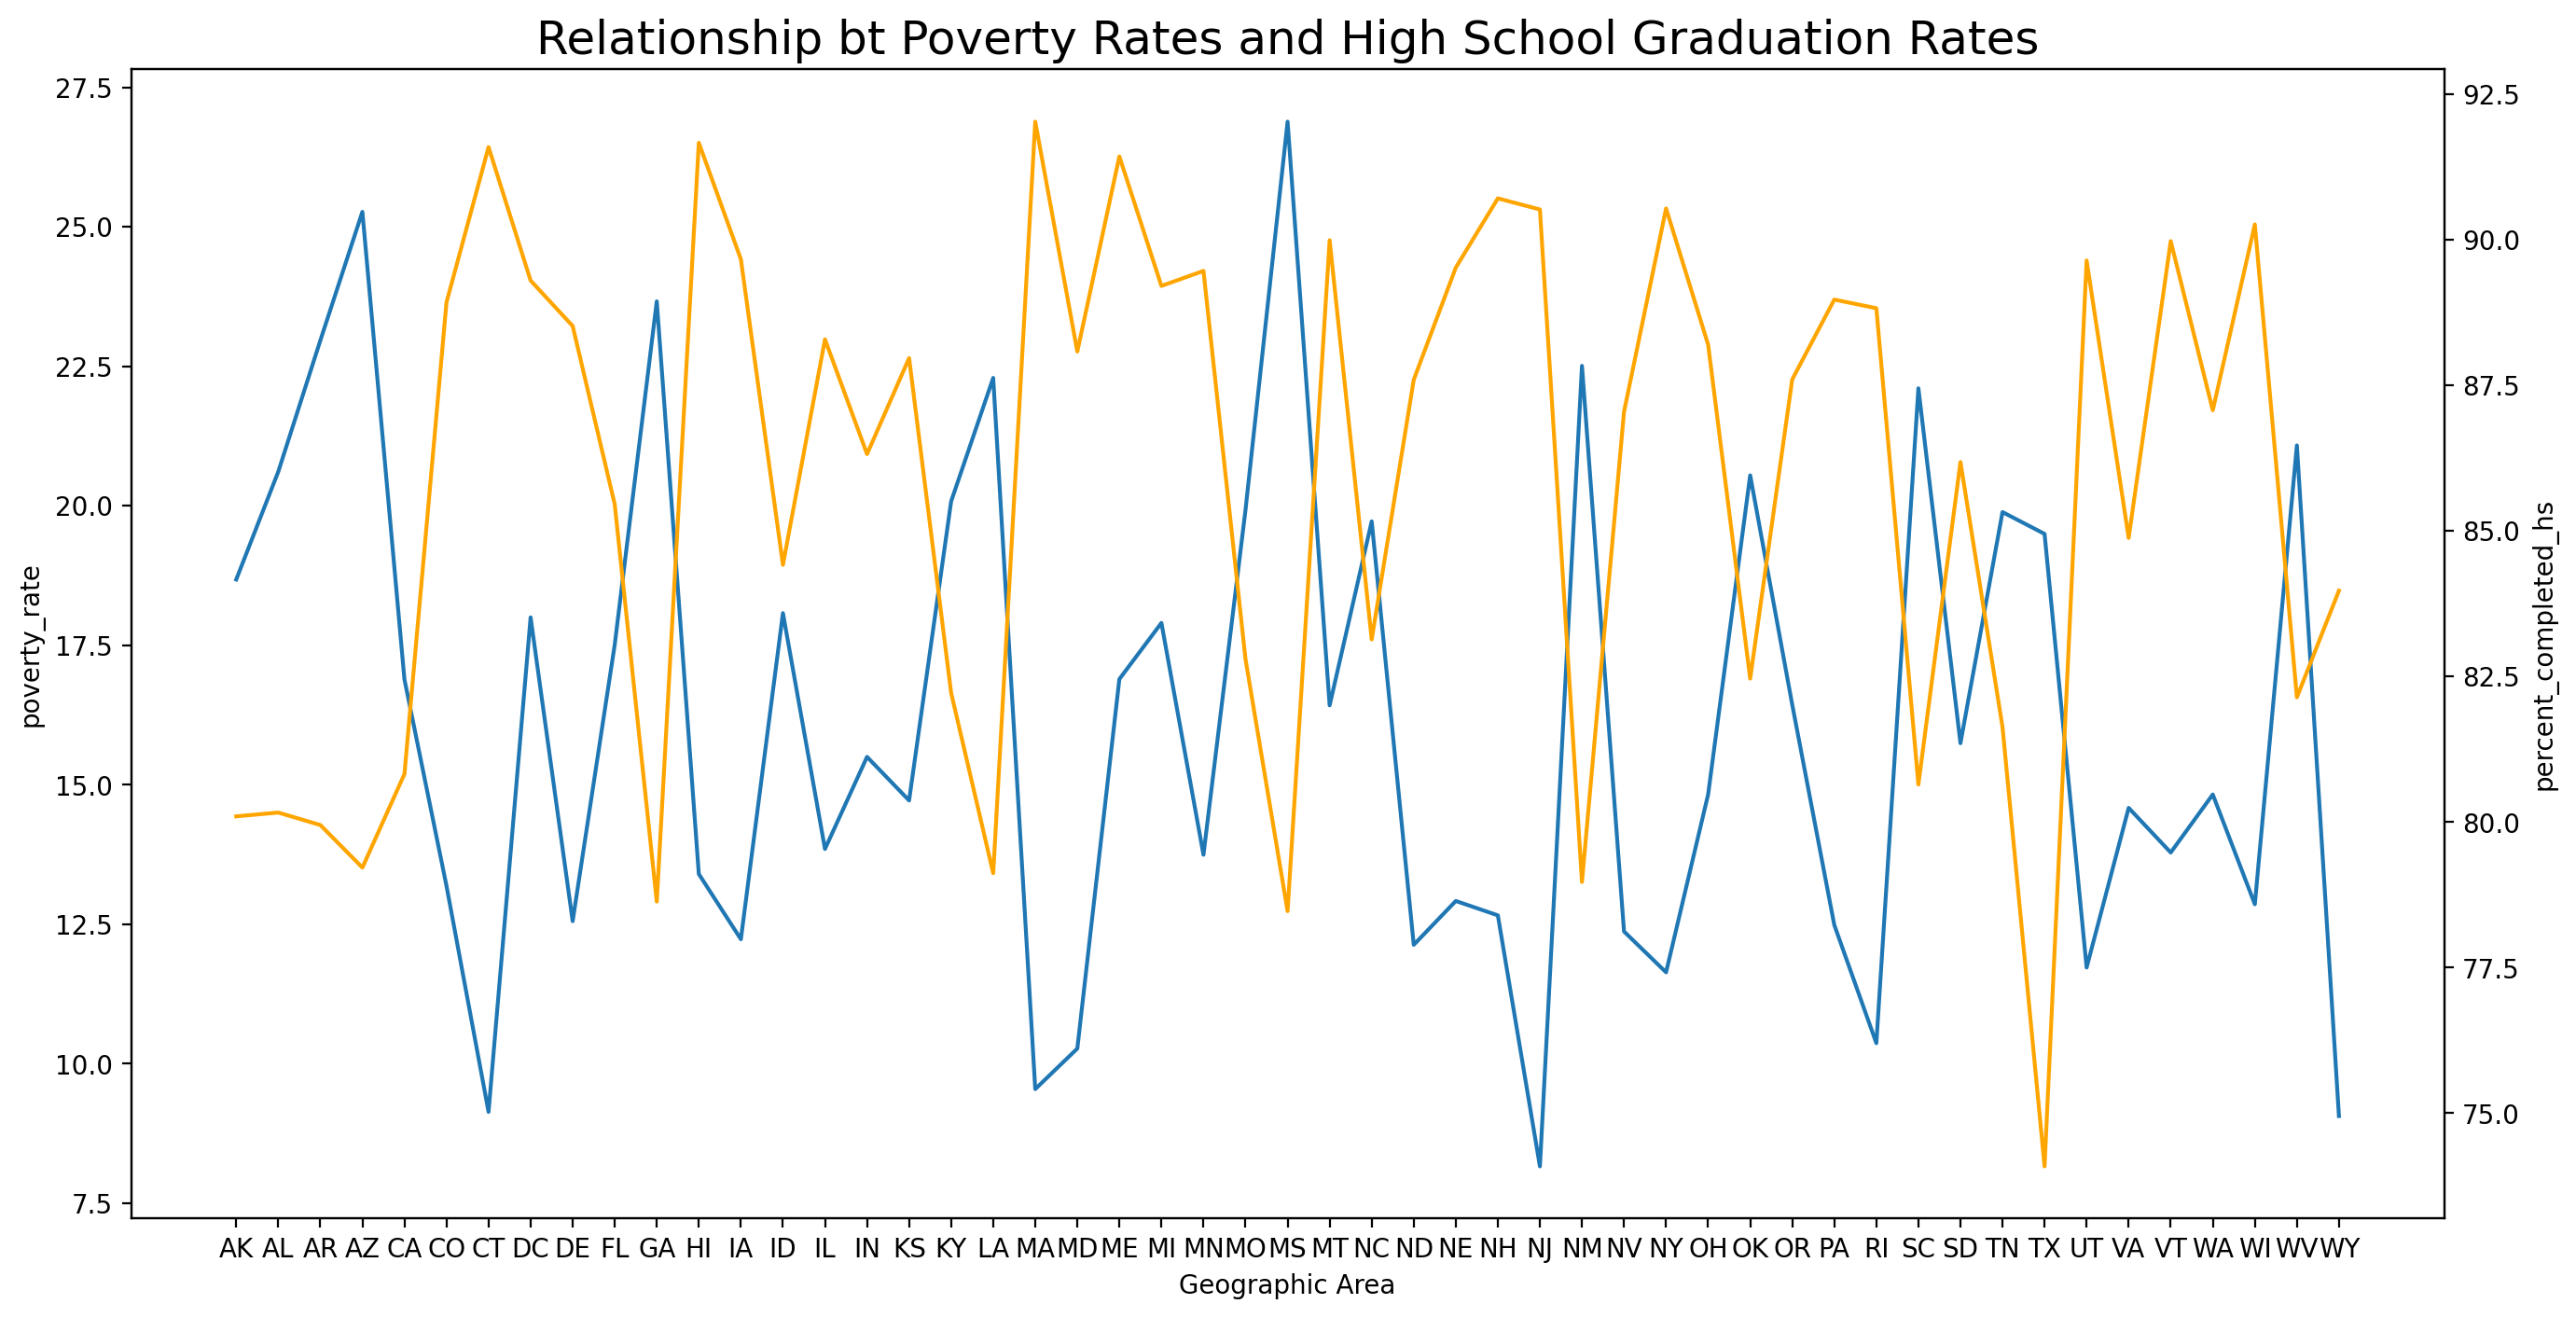

In [62]:
plt.figure(figsize=(16, 8), dpi=200)
plt.title("Relationship bt Poverty Rates and High School Graduation Rates", fontsize=18)

sns.lineplot(data=df_pct_poverty_state, x="Geographic Area", y="poverty_rate")
plt.twinx()
sns.lineplot(
    data=df_pct_chs_geo, x="Geographic Area", y="percent_completed_hs", color="orange"
)
plt.show()

💡 Summary: Poverty Rate shows negtive relationship with high school complete rate. The higher the poverty rate, the lower the high school rate.

#### Now use a Seaborn .jointplot() with a Kernel Density Estimate (KDE) and/or scatter plot to visualise the same relationship

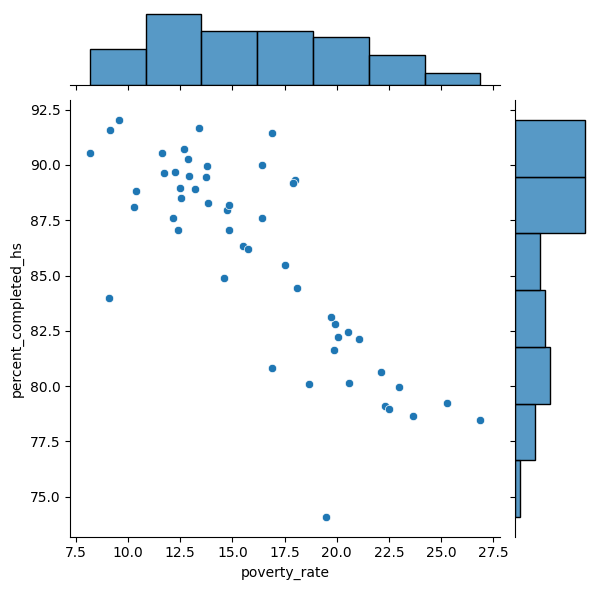

In [69]:
sns.jointplot(
    x=df_pct_poverty_state.poverty_rate,
    y=df_pct_chs_geo.percent_completed_hs,
    kind="scatter",
)
plt.show()

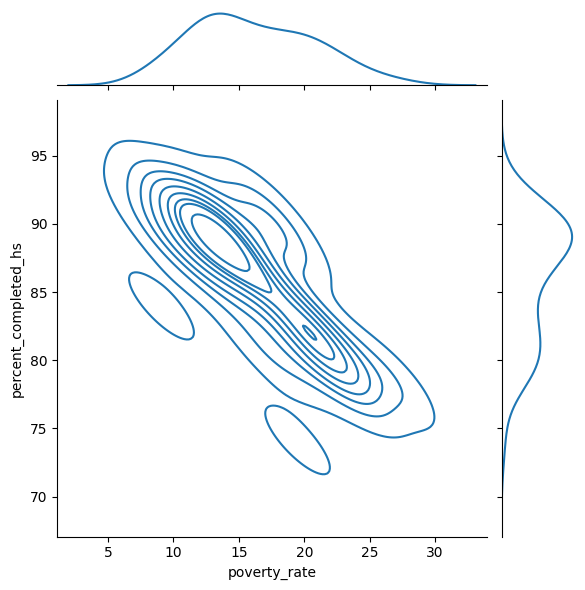

In [71]:
sns.jointplot(
    x=df_pct_poverty_state.poverty_rate,
    y=df_pct_chs_geo.percent_completed_hs,
    kind="kde",
)
plt.show()

#### Seaborn's `.lmplot()` or `.regplot()` to show a linear regression between the poverty ratio and the high school graduation ratio. 

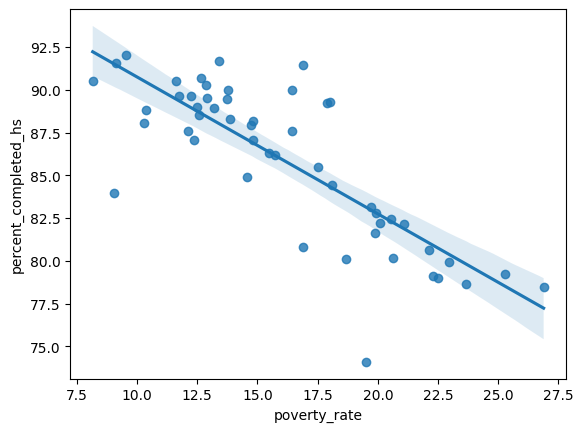

In [74]:
sns.regplot(
    x=df_pct_poverty_state.poverty_rate,
    y=df_pct_chs_geo.percent_completed_hs,
)
plt.show()

# Create a Bar Chart with Subsections Showing the Racial Makeup of Each US State

Visualise the share of the white, black, hispanic, asian and native american population in each US State using a bar chart with sub sections. 

In [79]:
df_share_race_city.head()

,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AL,Abanda CDP,67.2,30.2,0,0,1.6
1,AL,Abbeville city,54.4,41.4,0.1,1,3.1
2,AL,Adamsville city,52.3,44.9,0.5,0.3,2.3
3,AL,Addison town,99.1,0.1,0,0.1,0.4
4,AL,Akron town,13.2,86.5,0,0,0.3


In [98]:
# data preprocess for share_xx
for col_name in df_share_race_city.columns[2:]:
    print(col_name)
    df_share_race_city[col_name] = df_share_race_city[col_name].str.replace(
        "\(X\)", "0"
    )
    df_share_race_city[col_name] = df_share_race_city[col_name].str.replace(
        "\(0\)", "0"
    )
    df_share_race_city[col_name] = pd.to_numeric(df_share_race_city[col_name])
df_share_race_city.info()

share_white


AttributeError: Can only use .str accessor with string values!

In [102]:
df_race_geo = df_share_race_city.groupby(by="Geographic area", as_index=False).agg(
    {
        "share_white": pd.Series.mean,
        "share_black": pd.Series.mean,
        "share_native_american": pd.Series.mean,
        "share_asian": pd.Series.mean,
        "share_hispanic": pd.Series.mean,
    }
)
df_race_geo.head()

,Geographic area,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AK,45.264225,0.562535,45.477183,1.376620,2.130986
1,AL,72.507266,23.322318,0.659343,0.479758,2.980104
2,AR,78.449538,16.296858,0.759889,0.477079,4.273013
3,AZ,59.929047,0.954545,28.589800,0.726608,20.144568
4,CA,71.535982,2.679645,1.715167,5.542613,29.513592


In [108]:
df_race_geo_stack = df_race_geo.set_index("Geographic area").stack().reset_index()
df_race_geo_stack.columns = ["Geographic area", "share", "pct"]
df_race_geo_stack.head()

,Geographic area,share,pct
0,AK,share_white,45.264225
1,AK,share_black,0.562535
2,AK,share_native_american,45.477183
3,AK,share_asian,1.376620
4,AK,share_hispanic,2.130986


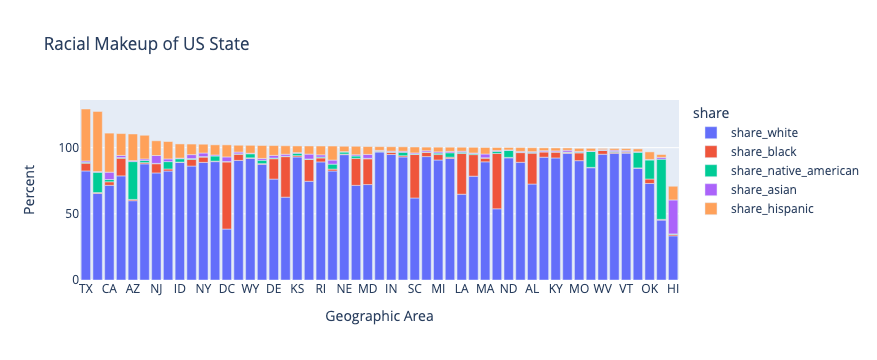

In [120]:
race_geo_bar = px.bar(
    data_frame=df_race_geo_stack,
    x="Geographic area",
    y="pct",
    color="share",
    title="Racial Makeup of US State",
    width=850,
)
race_geo_bar.update_layout(
    xaxis_title="Geographic Area",
    yaxis_title="Percent",
    xaxis={"categoryorder": "total descending"},
)
race_geo_bar.show()

# Create Donut Chart by of People Killed by Race

Hint: Use `.value_counts()`

In [123]:
df_fata_race = df_fatalities_clean.race.value_counts()
df_fata_race

W    1201
B     618
H     423
0     195
A      39
N      31
O      28
Name: race, dtype: int64

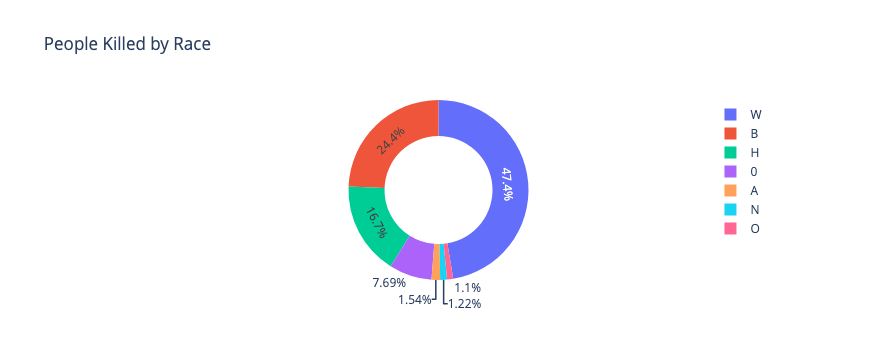

In [127]:
fata_race_donut = px.pie(
    names=df_fata_race.index,
    values=df_fata_race.values,
    hole=0.6,
    title="People Killed by Race",
)
fata_race_donut.show()

# Create a Chart Comparing the Total Number of Deaths of Men and Women

Use `df_fatalities` to illustrate how many more men are killed compared to women. 

In [168]:
df_fata_gender = df_fatalities_clean.gender.value_counts()
df_fata_gender

M    2428
F     107
Name: gender, dtype: int64

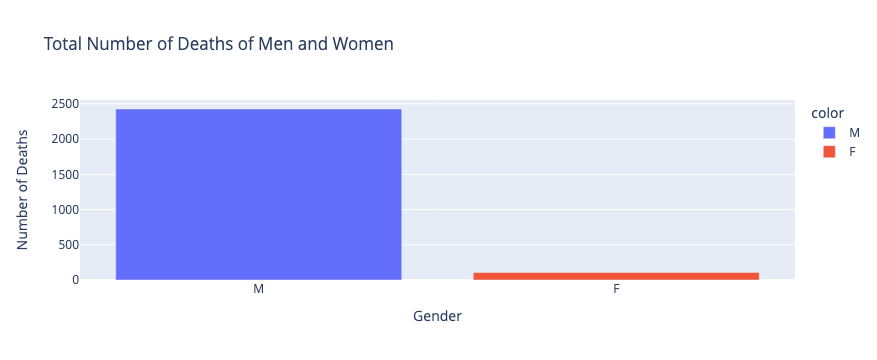

In [169]:
fata_gender_bar = px.bar(
    x=df_fata_gender.index,
    y=df_fata_gender.values,
    color=df_fata_gender.index,
    title="Total Number of Deaths of Men and Women",
)
fata_gender_bar.update_layout(xaxis_title="Gender", yaxis_title="Number of Deaths")
fata_gender_bar.show()

# Create a Box Plot Showing the Age and Manner of Death

Break out the data by gender using `df_fatalities`. Is there a difference between men and women in the manner of death? 

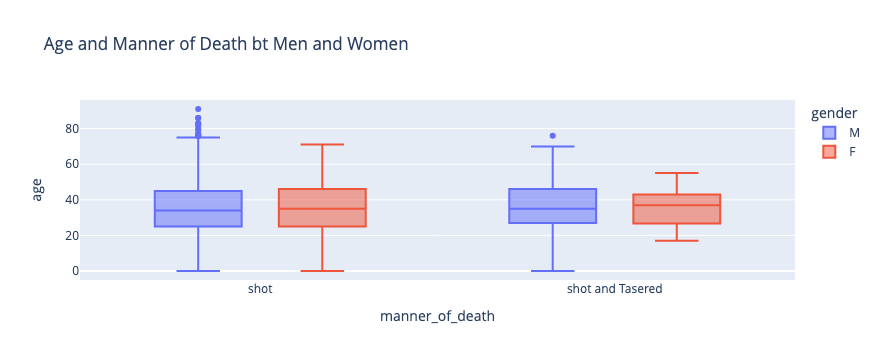

In [170]:
age_box = px.box(
    data_frame=df_fatalities_clean,
    x="manner_of_death",
    y="age",
    color="gender",
    title="Age and Manner of Death bt Men and Women",
)
age_box.show()

# Were People Armed? 

In what percentage of police killings were people armed? Create chart that show what kind of weapon (if any) the deceased was carrying. How many of the people killed by police were armed with guns versus unarmed? 

In [171]:
armed_pct = (
    df_fatalities_clean[df_fatalities_clean.armed == "unarmed"].shape[0]
    / df_fatalities_clean.shape[0]
    * 100
)
print(f"{armed_pct:.2}% of people were armed")

6.7% of people were armed


In [172]:
df_weapon = df_fatalities_clean[
    df_fatalities_clean.armed != "unarmed"
].armed.value_counts()
df_weapon

gun             1398
knife            373
vehicle          177
undetermined     117
toy weapon       104
                ... 
hand torch         1
garden tool        1
pole               1
pick-axe           1
pen                1
Name: armed, Length: 68, dtype: int64

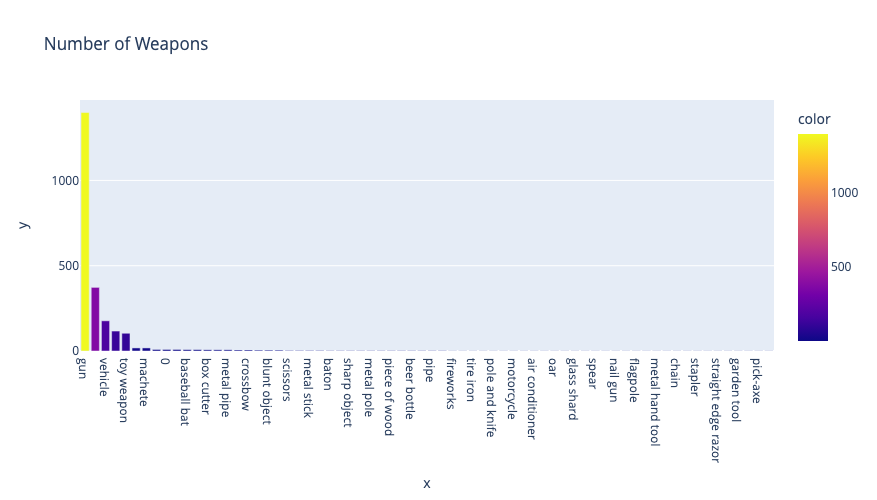

In [173]:
weapon_bar = px.bar(
    x=df_weapon.index,
    y=df_weapon.values,
    color=df_weapon.values,
    height=500,
    title="Number of Weapons",
)
weapon_bar.show()

In [174]:
gun = df_fatalities_clean[df_fatalities_clean.armed == "gun"].shape[0]
gun_pct = gun / df_fatalities_clean.shape[0] * 100
unarm = df_fatalities_clean[df_fatalities_clean.armed == "unarmed"].shape[0]
unarm_pct = unarm / df_fatalities_clean.shape[0] * 100
print(f"{gun}/{gun_pct:.3}% people killed by police were armed with guns")
print(f"{unarm}/{unarm_pct:.2}% people killed by police were unarmed")

1398/55.1% people killed by police were armed with guns
171/6.7% people killed by police were unarmed


# How Old Were the People Killed?

Work out what percentage of people killed were under 25 years old.  

In [177]:
under_25 = df_fatalities_clean[df_fatalities_clean.age <= 25].shape[0]
under_25_pct = under_25 / df_fatalities_clean.shape[0] * 100
print(f"{under_25}/{under_25_pct:.2f}% people killed were under 25 years old.")

630/24.85% people killed were under 25 years old.


Create a histogram and KDE plot that shows the distribution of ages of the people killed by police. 

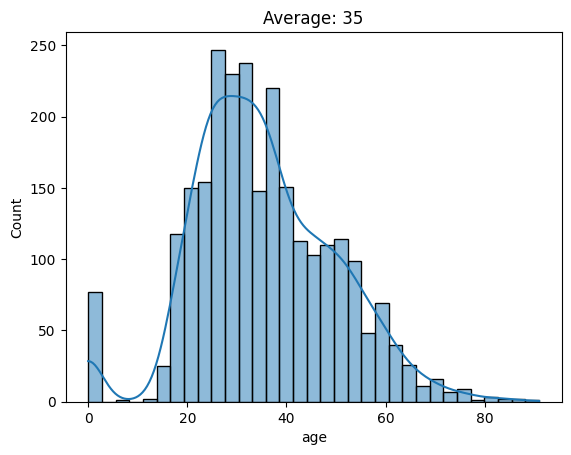

In [186]:
sns.histplot(
    data=df_fatalities_clean,
    x="age",
    kde=True,
)
plt.title(f"Average: {df_fatalities_clean.age.mean():.0f}")
plt.show()

Create a seperate KDE plot for each race. Is there a difference between the distributions? 

In [187]:
df_fatalities_clean.race.unique()

array(['A', 'W', 'H', 'B', 'O', 0, 'N'], dtype=object)

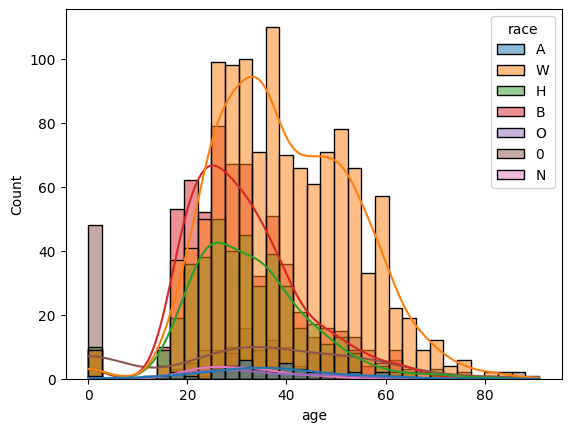

In [199]:
sns.histplot(data=df_fatalities_clean, x="age", hue="race", kde=True)
plt.show()

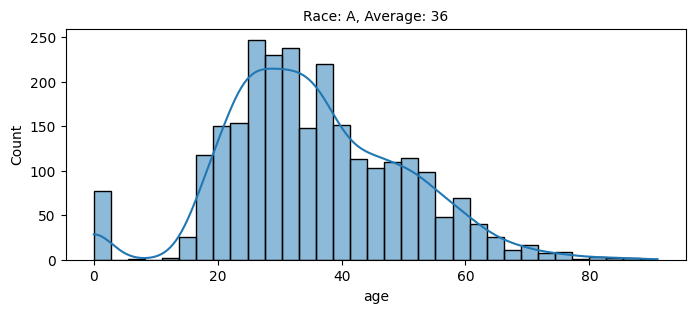

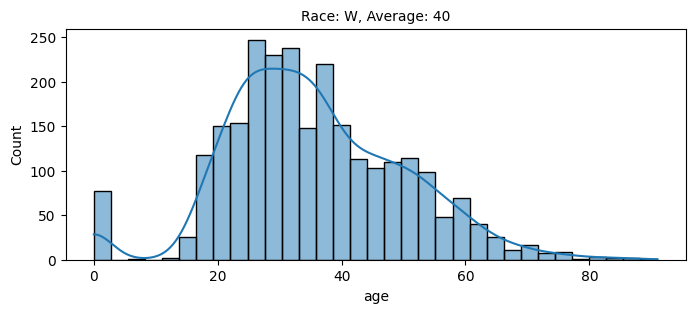

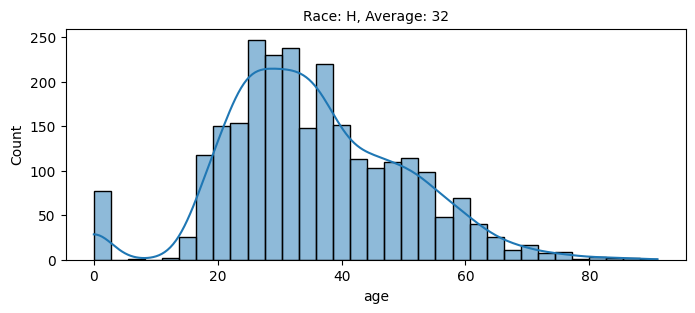

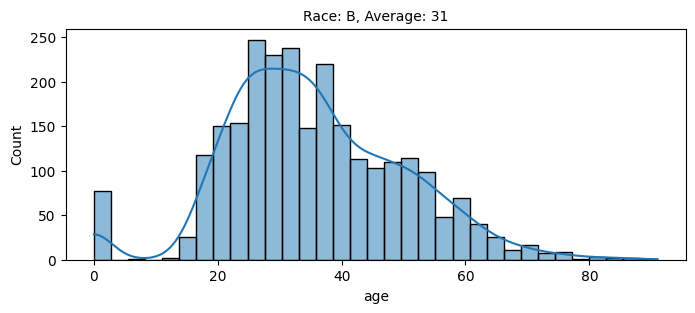

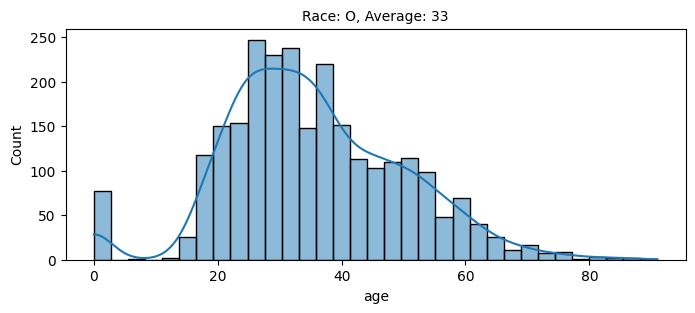

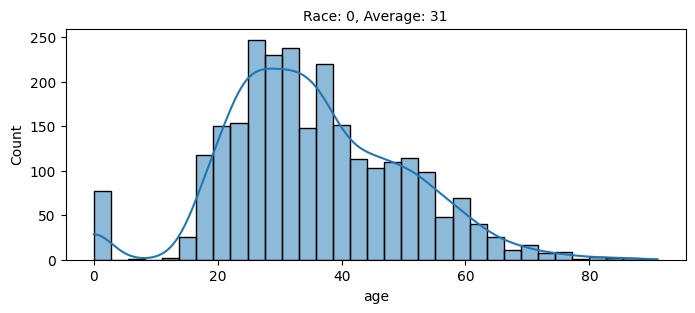

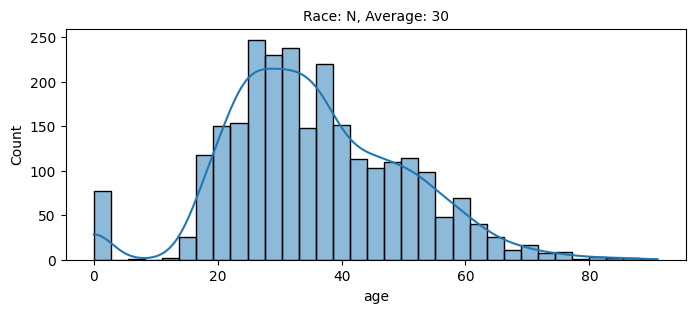

In [198]:
for race in df_fatalities_clean.race.unique():
    df_race = df_fatalities_clean[df_fatalities_clean.race == race]
    plt.figure(figsize=(8, 3))
    sns.histplot(data=df_fatalities_clean, x="age", kde=True)
    plt.title(f"Race: {race}, Average: {df_race.age.mean():.0f}", fontsize=10)
    plt.show()

# Race of People Killed

Create a chart that shows the total number of people killed by race. 

In [208]:
df_race = df_fatalities_clean.race.value_counts()
df_race

W    1201
B     618
H     423
0     195
A      39
N      31
O      28
Name: race, dtype: int64

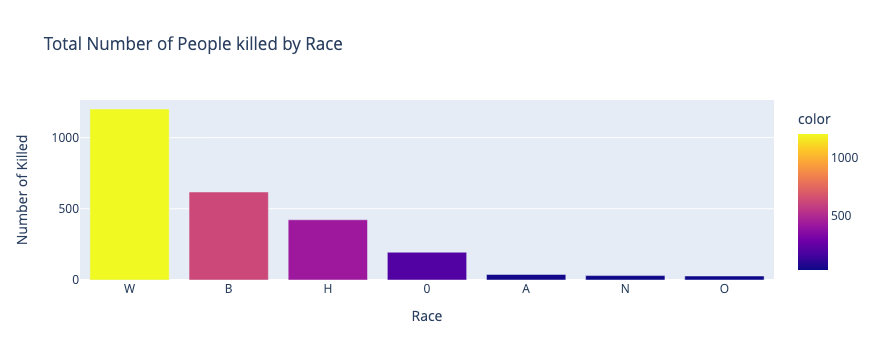

In [202]:
race_bar = px.bar(
    x=df_race.index,
    y=df_race.values,
    color=df_race.values,
    title="Total Number of People killed by Race",
)
race_bar.update_layout(xaxis_title="Race", yaxis_title="Number of Killed")
race_bar.show()

# Mental Illness and Police Killings

What percentage of people killed by police have been diagnosed with a mental illness?

In [212]:
mental = df_fatalities_clean[df_fatalities_clean.signs_of_mental_illness == True].shape[
    0
]
mental_pct = mental / df_fatalities_clean.shape[0] * 100

In [213]:
print(
    f"{mental}/{mental_pct:.2f}% of people killed by police have been diagnosed with a mental illness."
)

633/24.97% of people killed by police have been diagnosed with a mental illness.


# In Which Cities Do the Most Police Killings Take Place?

Create a chart ranking the top 10 cities with the most police killings. Which cities are the most dangerous?  

In [282]:
df_top10_cities = df_fatalities_clean.groupby(["state", "city"], as_index=False).agg(
    {"name": pd.Series.count}
)
df_top10_cities = df_top10_cities.sort_values(by="name", ascending=False).head(10)
df_top10_cities

,state,city,name
218,CA,Los Angeles,39
94,AZ,Phoenix,31
1314,TX,Houston,26
561,IL,Chicago,25
990,NV,Las Vegas,21
1360,TX,San Antonio,20
426,FL,Miami,17
1034,OH,Columbus,17
1274,TX,Austin,16
840,MO,St. Louis,15


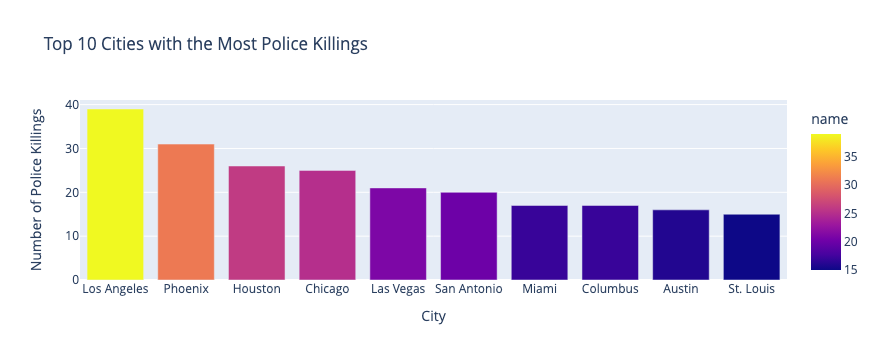

In [279]:
top10_bar = px.bar(
    data_frame=df_top10_cities,
    x="city",
    y="name",
    color="name",
    title="Top 10 Cities with the Most Police Killings",
)
top10_bar.update_layout(xaxis_title="City", yaxis_title="Number of Police Killings")
top10_bar

# Rate of Death by Race

Find the share of each race in the top 10 cities. Contrast this with the top 10 cities of police killings to work out the rate at which people are killed by race for each city. 

In [313]:
df_top10_cities.head()
df_top10_cities.rename(columns={"name": "killings"}, inplace=True)

In [318]:
df_top10_cities["killings_pct"] = (
    df_top10_cities.killings / df_fatalities_clean.shape[0] * 100
)
df_top10_cities.head()

,state,city,killings,killings_pct
218,CA,Los Angeles,39,1.538462
94,AZ,Phoenix,31,1.222880
1314,TX,Houston,26,1.025641
561,IL,Chicago,25,0.986193
990,NV,Las Vegas,21,0.828402


In [314]:
df_share_race_city["modified_city"] = df_share_race_city.City.str.replace(
    "city", ""
).str.strip()

In [315]:
df_share_race_city.head()

,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic,modified_city
0,AL,Abanda CDP,67.2,30.2,0.0,0.0,1.6,Abanda CDP
1,AL,Abbeville city,54.4,41.4,0.1,1.0,3.1,Abbeville
2,AL,Adamsville city,52.3,44.9,0.5,0.3,2.3,Adamsville
3,AL,Addison town,99.1,0.1,0.0,0.1,0.4,Addison town
4,AL,Akron town,13.2,86.5,0.0,0.0,0.3,Akron town


In [322]:
df_top10_merge = df_top10_cities.merge(
    df_share_race_city,
    left_on=["state", "city"],
    right_on=["Geographic area", "modified_city"],
)

In [325]:
df_top10_merge.head()

,state,city,killings,killings_pct,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic,modified_city
0,CA,Los Angeles,39,1.538462,CA,Los Angeles city,49.8,9.6,0.7,11.3,48.5,Los Angeles
1,AZ,Phoenix,31,1.222880,AZ,Phoenix city,65.9,6.5,2.2,3.2,40.8,Phoenix
2,TX,Houston,26,1.025641,TX,Houston city,50.5,23.7,0.7,6.0,43.8,Houston
3,IL,Chicago,25,0.986193,IL,Chicago city,45.0,32.9,0.5,5.5,28.9,Chicago
4,NV,Las Vegas,21,0.828402,NV,Las Vegas city,62.1,11.1,0.7,6.1,31.5,Las Vegas


In [332]:
[item for item in df_top10_merge.columns if "share_" not in item]

['state',
 'city',
 'killings',
 'killings_pct',
 'Geographic area',
 'City',
 'modified_city']

In [333]:
df_top10_merge.set_index(
    [item for item in df_top10_merge.columns if "share_" not in item], inplace=True
)
df_top10_stack = df_top10_merge.stack()

In [338]:
df_top10_stack = df_top10_stack.reset_index().rename(
    columns={"level_7": "race", 0: "pct"}
)
df_top10_stack.head()

,index,state,city,killings,killings_pct,Geographic area,City,modified_city,race,pct
0,0,CA,Los Angeles,39,1.538462,CA,Los Angeles city,Los Angeles,share_white,49.8
1,1,CA,Los Angeles,39,1.538462,CA,Los Angeles city,Los Angeles,share_black,9.6
2,2,CA,Los Angeles,39,1.538462,CA,Los Angeles city,Los Angeles,share_native_american,0.7
3,3,CA,Los Angeles,39,1.538462,CA,Los Angeles city,Los Angeles,share_asian,11.3
4,4,CA,Los Angeles,39,1.538462,CA,Los Angeles city,Los Angeles,share_hispanic,48.5


In [340]:
df_top10_stack["race_killings"] = df_top10_stack.killings * df_top10_stack.pct / 100
df_top10_stack["race_klllings_pct"] = (
    df_top10_stack.killings_pct * df_top10_stack.pct / 100
)
df_top10_stack.head()

,index,state,city,killings,killings_pct,Geographic area,City,modified_city,race,pct,race_killings,race_klllings_pct
0,0,CA,Los Angeles,39,1.538462,CA,Los Angeles city,Los Angeles,share_white,49.8,19.422,0.766154
1,1,CA,Los Angeles,39,1.538462,CA,Los Angeles city,Los Angeles,share_black,9.6,3.744,0.147692
2,2,CA,Los Angeles,39,1.538462,CA,Los Angeles city,Los Angeles,share_native_american,0.7,0.273,0.010769
3,3,CA,Los Angeles,39,1.538462,CA,Los Angeles city,Los Angeles,share_asian,11.3,4.407,0.173846
4,4,CA,Los Angeles,39,1.538462,CA,Los Angeles city,Los Angeles,share_hispanic,48.5,18.915,0.746154


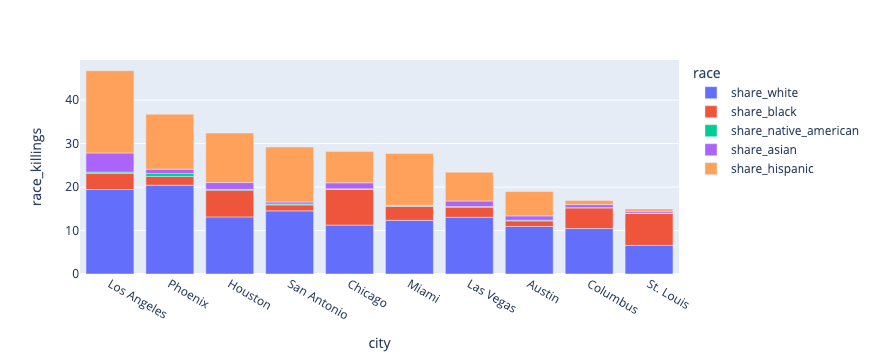

In [347]:
top10_race_bar = px.bar(
    data_frame=df_top10_stack, x="city", y="race_killings", color="race"
)
top10_race_bar.update_layout(xaxis={"categoryorder": "total descending"})
top10_race_bar.show()

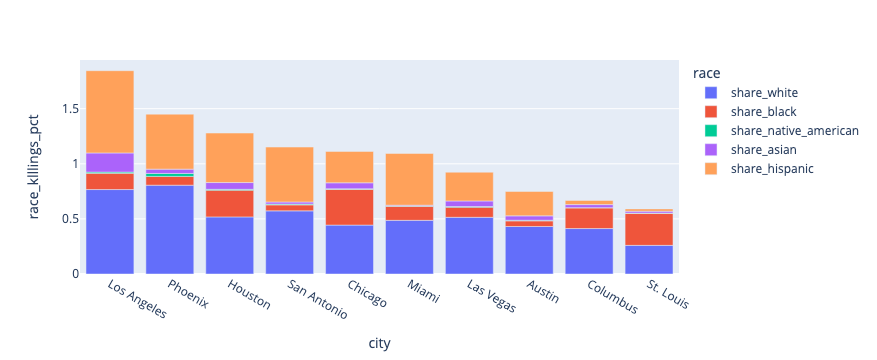

In [350]:
top10_race_bar = px.bar(
    data_frame=df_top10_stack, x="city", y="race_klllings_pct", color="race"
)
top10_race_bar.update_layout(xaxis={"categoryorder": "total descending"})
top10_race_bar.show()

# Create a Choropleth Map of Police Killings by US State

Which states are the most dangerous? Compare your map with your previous chart. Are these the same states with high degrees of poverty? 

In [354]:
df_fata_geo = df_fatalities_clean.state.value_counts()
df_fata_geo.head()

CA    424
TX    225
FL    154
AZ    118
OH     79
Name: state, dtype: int64

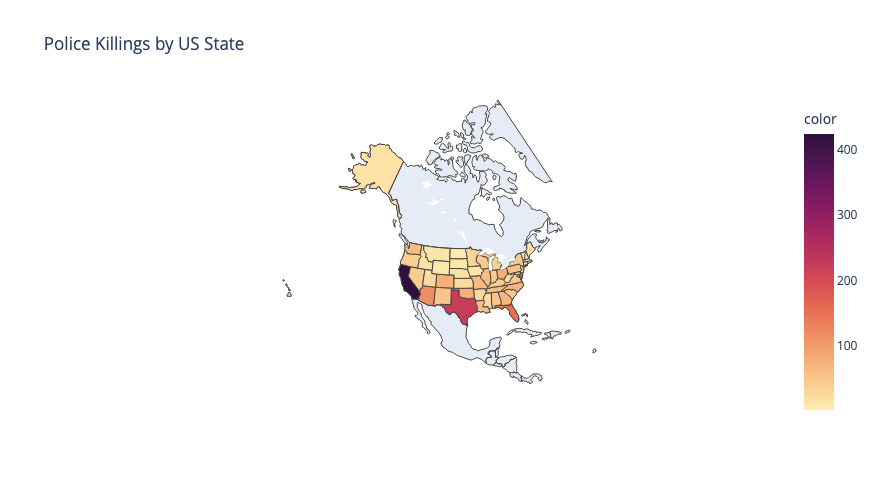

In [371]:
px.choropleth(
    locations=df_fata_geo.index,
    locationmode="USA-states",
    color=df_fata_geo.values,
    scope="north america",
    color_continuous_scale="matter",
    width=600,
    height=500,
    title="Police Killings by US State",
)

# Number of Police Killings Over Time

Analyse the Number of Police Killings over Time. Is there a trend in the data? 

In [380]:
df_fatalities_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2535 entries, 0 to 2534
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       2535 non-null   int64  
 1   name                     2535 non-null   object 
 2   date                     2535 non-null   object 
 3   manner_of_death          2535 non-null   object 
 4   armed                    2535 non-null   object 
 5   age                      2535 non-null   float64
 6   gender                   2535 non-null   object 
 7   race                     2535 non-null   object 
 8   city                     2535 non-null   object 
 9   state                    2535 non-null   object 
 10  signs_of_mental_illness  2535 non-null   bool   
 11  threat_level             2535 non-null   object 
 12  flee                     2535 non-null   object 
 13  body_camera              2535 non-null   bool   
dtypes: bool(2), float64(1), 

In [381]:
# type change to datetime for date column
df_fatalities_clean.date = pd.to_datetime(df_fatalities_clean.date)
df_fatalities_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2535 entries, 0 to 2534
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       2535 non-null   int64         
 1   name                     2535 non-null   object        
 2   date                     2535 non-null   datetime64[ns]
 3   manner_of_death          2535 non-null   object        
 4   armed                    2535 non-null   object        
 5   age                      2535 non-null   float64       
 6   gender                   2535 non-null   object        
 7   race                     2535 non-null   object        
 8   city                     2535 non-null   object        
 9   state                    2535 non-null   object        
 10  signs_of_mental_illness  2535 non-null   bool          
 11  threat_level             2535 non-null   object        
 12  flee                     2535 non-

In [385]:
df_time = df_fatalities_clean.date.value_counts().sort_index()
df_time.head()

2015-01-03    3
2015-01-04    2
2015-01-06    1
2015-01-07    2
2015-01-08    2
Name: date, dtype: int64

In [393]:
df_time.index

DatetimeIndex(['2015-01-03', '2015-01-04', '2015-01-06', '2015-01-07',
               '2015-01-08', '2015-01-09', '2015-01-11', '2015-01-12',
               '2015-01-13', '2015-01-14',
               ...
               '2017-11-05', '2017-11-06', '2017-11-07', '2017-12-01',
               '2017-12-02', '2017-12-03', '2017-12-04', '2017-12-05',
               '2017-12-06', '2017-12-07'],
              dtype='datetime64[ns]', length=879, freq=None)

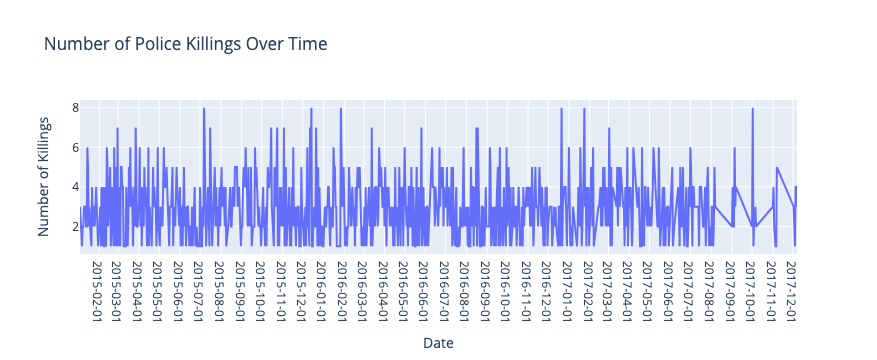

In [402]:
killing_time_line = px.line(
    x=df_time.index,
    y=df_time.values,
    title="Number of Police Killings Over Date",
)
killing_time_line.update_layout(
    xaxis_title="Date",
    yaxis_title="Number of Killings",
    xaxis={"tickformat": "%Y-%m-%d", "dtick": "M1"},
)

In [399]:
df_fatalities_clean.date.dt.year.value_counts()

2015    991
2016    963
2017    581
Name: date, dtype: int64

In [404]:
df_fata_months = df_fatalities_clean.date.dt.month.value_counts().sort_index()
df_fata_months

1     230
2     226
3     250
4     233
5     228
6     221
7     234
8     183
9     184
10    187
11    180
12    179
Name: date, dtype: int64

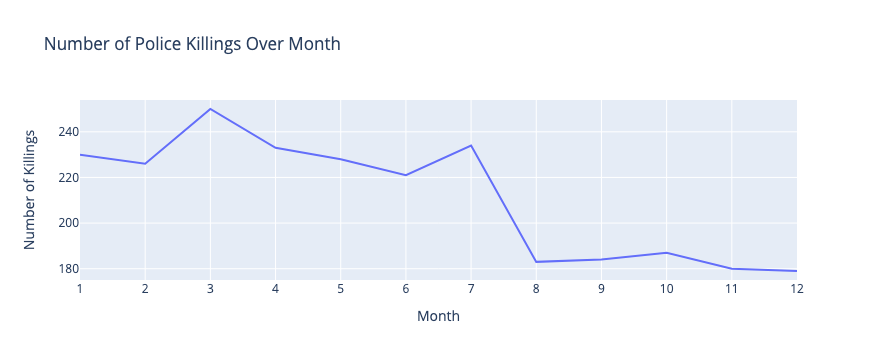

In [406]:
month_line = px.line(
    x=df_fata_months.index,
    y=df_fata_months.values,
    title="Number of Police Killings Over Month",
)
month_line.update_layout(
    xaxis_title="Month",
    yaxis_title="Number of Killings",
    xaxis={"tickformat": "%Y-%m-%d", "dtick": "M1"},
)

# Epilogue

Now that you have analysed the data yourself, read [The Washington Post's analysis here](https://www.washingtonpost.com/graphics/investigations/police-shootings-database/).